In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path  = '/run/media/lee/New Volume/Desktop/data_science/Code/A2_Pandas/P1_Getting_Knowing_Data/chipotle.tsv'
raw_df  = pd.read_csv(path, sep = "\t")

In [ ]:
df = raw_df
df.describe(include='all')

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [11]:
df_item_price = df['item_price'].str[1:]
df_item_price = pd.to_numeric(df_item_price)
df['item_price']= df_item_price
df['item_price'].head()

AttributeError: Can only use .str accessor with string values!

In [14]:
df['Sales'] = df['quantity'] * df['item_price']

In [15]:
df.loc[(df['item_name']=='Chicken Bowl') & (df['quantity'] == 0), ['order_id']]

,order_id


In [215]:
df.loc[(df['item_name']=='Chicken Bowl') & (df['quantity'] ==3), ['item_name']]

,item_name
409,Chicken Bowl
1514,Chicken Bowl


In [226]:
second_row  = 1
print(df.iloc[second_row])
print(type(df.iloc[second_row]))

order_id                         1
quantity                         1
item_name                     Izze
choice_description    [Clementine]
item_price                    3.39
Sales                         3.39
Name: 1, dtype: object
<class 'pandas.core.series.Series'>


In [224]:
print(df.iloc[[second_row]])
print(type(df.iloc[[second_row]]))


<class 'pandas.core.frame.DataFrame'>


In [229]:
start_row = 0
end_row = 54
df.iloc[start_row: end_row]

,order_id,quantity,item_name,choice_description,item_price,Sales
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [231]:
# Remove last columm
last_column_index = -1
df.iloc[start_row:end_row, : last_column_index]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [233]:
last_column = df.iloc[start_row:end_row, last_column_index]
last_column

0     2.39
1     3.39
2     3.39
3     2.39
4    33.96
Name: Sales, dtype: float64

In [236]:
revenue = df['Sales'].sum()
revenue

39237.02

In [247]:
def draw_bar_chart(x_axis,y_axis,x_name= None, y_name = None):
    plt.figure(figsize=(10, 8))
    plt.bar(x = x_axis, height = y_axis, color = 'green')
    plt.xticks(x_axis,rotation = 90)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

# What products are most often sold together?

In [58]:
df_dup = df[df['order_id'].duplicated(keep=False)]

In [67]:
groupProduct = lambda product:  ', '.join(product)
df_dup['All Products']= df_dup.groupby('order_id')['item_name'].transform(groupProduct)
df_dup['All Products'].value_counts().head(10)

/tmp/ipykernel_159703/1367000685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products']= df_dup.groupby('order_id')['item_name'].transform(groupProduct)


Chicken Bowl, Chips and Guacamole              116
Chicken Burrito, Chips and Guacamole            74
Chicken Bowl, Chips, Canned Soft Drink          72
Steak Burrito, Chips and Guacamole              52
Chicken Bowl, Chips, Bottled Water              51
Chicken Bowl, Chicken Bowl                      42
Steak Burrito, Canned Soda                      40
Chicken Bowl, Side of Chips                     38
Steak Burrito, Chips and Fresh Tomato Salsa     36
Chicken Bowl, Canned Soft Drink                 34
Name: All Products, dtype: int64

# How many people spend on their meat ?

In [244]:
sumOrder = lambda product:  sum(product)
df_dup['Sum Each Order']= df_dup.groupby('order_id')['Sales'].transform(sumOrder)
df_dup['Sum Each Order'].value_counts().head(10)

/tmp/ipykernel_159703/1863894546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['Sum Each Order']= df_dup.groupby('order_id')['Sales'].transform(sumOrder)


13.20    151
12.15    120
12.95     93
12.48     90
17.50     82
13.70     77
12.50     76
12.40     75
10.08     72
18.00     68
Name: Sum Each Order, dtype: int64

# What was the most-ordered item ?

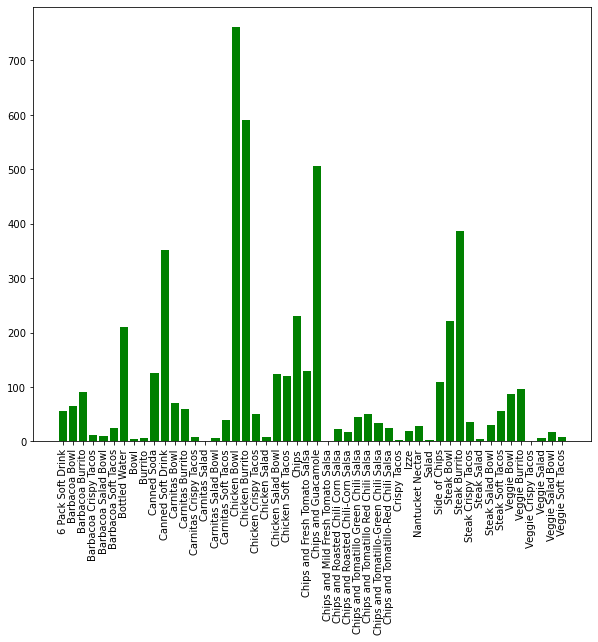

In [248]:
quantity = df.groupby('item_name')['quantity'].sum()
list_item_name = quantity.index
draw_bar_chart(list_item_name,quantity)

In [254]:
print(quantity.idxmax(), 'was the most-ordered item')

Chicken Bowl was the most-ordered item
